In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazonreviews/test.ft.txt.bz2
/kaggle/input/amazonreviews/train.ft.txt.bz2
/kaggle/input/amazon-reviews/train.csv
/kaggle/input/amazon-reviews/test.csv


In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [4]:
train_df = pd.read_csv('/kaggle/input/amazon-reviews/train.csv') 
test_df= pd.read_csv('/kaggle/input/amazon-reviews/test.csv')

In [5]:
# nltk.data.path.append('/kaggle/input/YOUR-UPLOADED-NLTK-DATA/nltk_data')


In [6]:
import pandas as pd

# Adjust pandas display settings to show more of the text
pd.set_option('display.max_colwidth', None)  # Set to None to not truncate text

# Randomly select 5 rows from the dataset and display the full text
random_reviews = train_df.sample(5)
random_reviews[['label', 'text']]


,label,text
2524583,negative,"Perfectly Unstructured Writing: I bought this book a while ago and thought that I would read it at leisure but the way the authors dive into topics without presenting a rational explanation is simply absurd. Even the contrast between XML and HTML on page 6 is wonderfully blurry. The book appears structured but revels in throwing coding examples at you without a premise. I know and practice both XHTML and CSS but this book made XML seem like rocket science, which it is not. Please do not buy this book and waste your money."
3164123,negative,"HP is a joke: Ive had this printer for 3 years now and, tonight, im having to re-install the support software for this turd on a new machine. In all honesty the printer isnt so bad. Im not a printer geek so i dont know how it really compares. For me, its quick enough, pictures come out clear enough, ink lasts long enough. However, all the support stuff that you take for granted...like...i dont know...putting the driver cd in your machine and having a nice, quick, clean install....forget about it. HP should be assamed of the software they built for this thing. Its a joke. Good luck trying to get this running..and if you do get it goin, let me introduce you to your new best friend. His name is ""Spooler.exe experienced a fatal error"". Have fun with him, cause you get to see him often. How this thing got out the door i have no idea, but feel free to ask rajeeve, he will have a non-coherent answer for ya."
2456363,negative,"Run screaming: Other than the fact that it just didn't work, there's the little things, like selecting 128 bit encryption mode to be compatible with my home network and finding out you can only enter 10 characters instead of 16 making it impossible to configure.I hope they didn't pay the monkey they used for testing this product very much."
2656524,positive,"For Personal Use The Stethoscope Is Poor: If you're using this to take your own blood pressure DO NOT BUY. In order for an individual to successfully take their own blood pressure the chestpiece on the stethoscope must slide under the cuff because you don't have enough hands to hold everything. This one is far too large to it under the cuff, it's meant to be pressed against the arm just below the cuff.I purchased a sphygmomanometer & stethoscope in 1975 that I used successfully until it fell apart last month. This was supposed to be it's replacement. This product is fine for a physician use but too difficult for use on one's self.I gave it four stars because it will work fine if you are taking someone else's blood pressure. However, the sound in the stethoscope is low."
376507,positive,"Surprisingly fun and challenging!: I bought Sweating to the Oldies because I wanted to get back in to exercising and I figured these DVDs would be pretty novice, so I thought it would be a good way to ease back in to things. I was sure that Richard would be completely unbearable and annoying, but surprisingly... these workouts are FUN! He doesn't do a lot of coaching and encouraging throughout the workout like some other workout DVDs I have tried, which I appreicate because I find that to be a very annoying characteristic of other home workout instructors. Not only did I find it to be enjoyable, but I was actually breaking a sweat! This has been a great purchase for me and will be for you, too if you are looking for a way to workout in the morning before work, but can't quite make it to the gym that early."


In [7]:
train_df.columns

Index(['label', 'text'], dtype='object')

In [8]:
train_df['label'].value_counts()


label
positive    1800000
negative    1800000
Name: count, dtype: int64

In [9]:
train_df['text'][0]

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [10]:
for df in [train_df, test_df]:
    df['text_clean'] = df['text'].str.replace(r"[^a-zA-Z\s]", '', regex=True)
    df['text_clean'] = df['text_clean'].str.lower().str.strip()
    # sw = set(stopwords.words('english'))
    # def remove_stopwords(text):
    #     return ' '.join([word for word in text.split() if word.lower() not in sw])
    # df['text_clean'] = df['text'].apply(remove_stopwords)


In [11]:
sw = set(stopwords.words('english'))
negations = {"no", "not", "nor", "dont", "didnt", "isnt", "wasnt", "shouldnt", "wont", "cant", "couldnt"}
sw = sw.difference(negations)

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in sw])

train_df['text_clean'] = train_df['text_clean'].apply(remove_stopwords)
test_df['text_clean'] = test_df['text_clean'].apply(remove_stopwords)

## Attempted Lemmatization

In [12]:
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

In [13]:
# def lemmatize_tokenizer(text):
#     text = re.sub(r"[^a-zA-Z]", " ", text)  # Remove non-letters
#     tokens = nltk.word_tokenize(text.lower())  # Tokenize and lowercase
#     lemmas = [lemmatizer.lemmatize(token) for token in tokens if token not in sw and len(token) > 2]
#     return lemmas

### Attempting Tokenization

In [14]:
def tokenize_text(text):
    # Remove non-alphabet characters
    text = re.sub(r"[^a-zA-Z]", " ", text)
    
    # Lowercase and tokenize
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove stopwords and short tokens
    tokens = [token for token in tokens if token not in sw and len(token) > 2]
    
    return tokens

In [15]:
train_df['tokens'] = train_df['text_clean'].apply(tokenize_text)


In [16]:
train_df['text_clean'][0]


'stuning even nongamer sound track beautiful paints senery mind well would recomend even people hate vid game music played game chrono cross games ever played best music backs away crude keyboarding takes fresher step grate guitars soulful orchestras would impress anyone cares listen'

#### We’ll use TF-IDF (or CountVectorizer) to convert the text into numbers the model can understand.



In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # You can tweak this number
X_train = vectorizer.fit_transform(train_df['text_clean'])
X_test = vectorizer.transform(test_df['text_clean'])

y_train = train_df['label']
y_test = test_df['label']


In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
y_pred = model.predict(X_test)

logreg_acc=accuracy_score(y_test, y_pred)
print("Accuracy:",logreg_acc )
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8979875

Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.90      0.90    200000
    positive       0.90      0.90      0.90    200000

    accuracy                           0.90    400000
   macro avg       0.90      0.90      0.90    400000
weighted avg       0.90      0.90      0.90    400000



In [20]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear']  # for L1 support
# }
# model = LogisticRegression(max_iter=1000)
# #log_reg = LogisticRegression()a
# grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# grid.fit(X_train, y_train)

# print("Best Parameters:", grid.best_params_)
# print("Best Accuracy:", grid.best_score_)


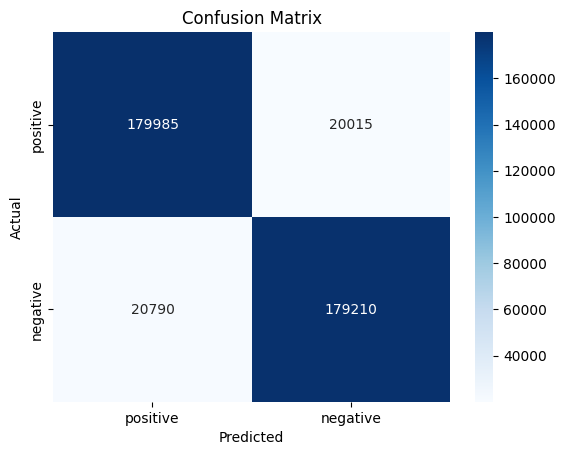

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Predicting 

In [22]:
# def predict_sentiment(text):
#     # Clean input
#     cleaned = re.sub(r"[^a-zA-Z\s]", '', text)
#     cleaned = cleaned.lower().strip()
#     cleaned = ' '.join([word for word in cleaned.split() if word not in sw])
    
#     # Vectorize and predict
#     vec = vectorizer.transform([cleaned])
#     prediction = model.predict(vec)[0]
#     return prediction

In [23]:
# user_input = input("Enter a review: ")
# print("Predicted sentiment:", predict_sentiment(user_input))


In [24]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, classification_report

# models = {
#     'Logistic Regression': LogisticRegression(max_iter=1000),
#     'Naive Bayes': MultinomialNB(),
#     'Linear SVM': LinearSVC(),
#     'Random Forest': RandomForestClassifier(n_estimators=100),
#     'MLP (Neural Net)': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
# }

# results = {}

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     preds = model.predict(X_test)
#     acc = accuracy_score(y_test, preds)
#     results[name] = acc
#     print(f"\n{name} Accuracy: {acc:.4f}")
#     print(classification_report(y_test, preds))


In [25]:
import pickle

# Save the model
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)


In [26]:
# Load the model
with open('logistic_regression_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as vec_file:
    vectorizer = pickle.load(vec_file)


# UNSUPERVISED

In [27]:
# Install if needed
!pip install nltk

# Import
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize
vader = SentimentIntensityAnalyzer()


[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


## Apply VADER to Text
#### You take each review and get its compound score (ranges from -1 to 1).

In [28]:
def vader_sentiment(text):
    scores = vader.polarity_scores(text)
    compound_score = scores['compound']
    return compound_score


In [29]:
def classify_sentiment_vader(text):
    score = vader_sentiment(text)
    if score >= 0:
        return 1   # Positive
    else:
        return 0   # Negative


#### Now, you can apply this classify_sentiment_vader() function to all your reviews!

In [ ]:
# Apply VADER classifier
test_df['vader_prediction'] = test_df['text'].apply(classify_sentiment_vader)


In [ ]:
label_map = {1: 'positive', 0: 'negative'}
test_df['vader_prediction'] = test_df['vader_prediction'].map(label_map)


In [ ]:
from sklearn.metrics import accuracy_score

# Compare VADER prediction with true labels
vader_acc = accuracy_score(test_df['label'], test_df['vader_prediction'])

print(f"VADER Accuracy: {vader_acc:.4f}")


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Compute the confusion matrix
vader_cm = confusion_matrix(test_df['label'], test_df['vader_prediction'])

# 2. Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=vader_cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('VADER Confusion Matrix')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['Logistic Regression', 'VADER']
accuracies = [logreg_acc, vader_acc]

# Create the bar plot
plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.ylim(0, 1)  # Accuracy goes from 0 to 1
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=12)

plt.show()
